In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {"axes.titlesize": 20, "axes.labelsize": 15, "legend.fontsize": 15, "lines.linewidth": 3, "figure.figsize": (9, 4)})

In [2]:
from sklearn import datasets

# Load dataset (regression) and divide into training and testing.
X, y = datasets.fetch_california_housing(return_X_y = True)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:42<00:00, 34.08s/it]


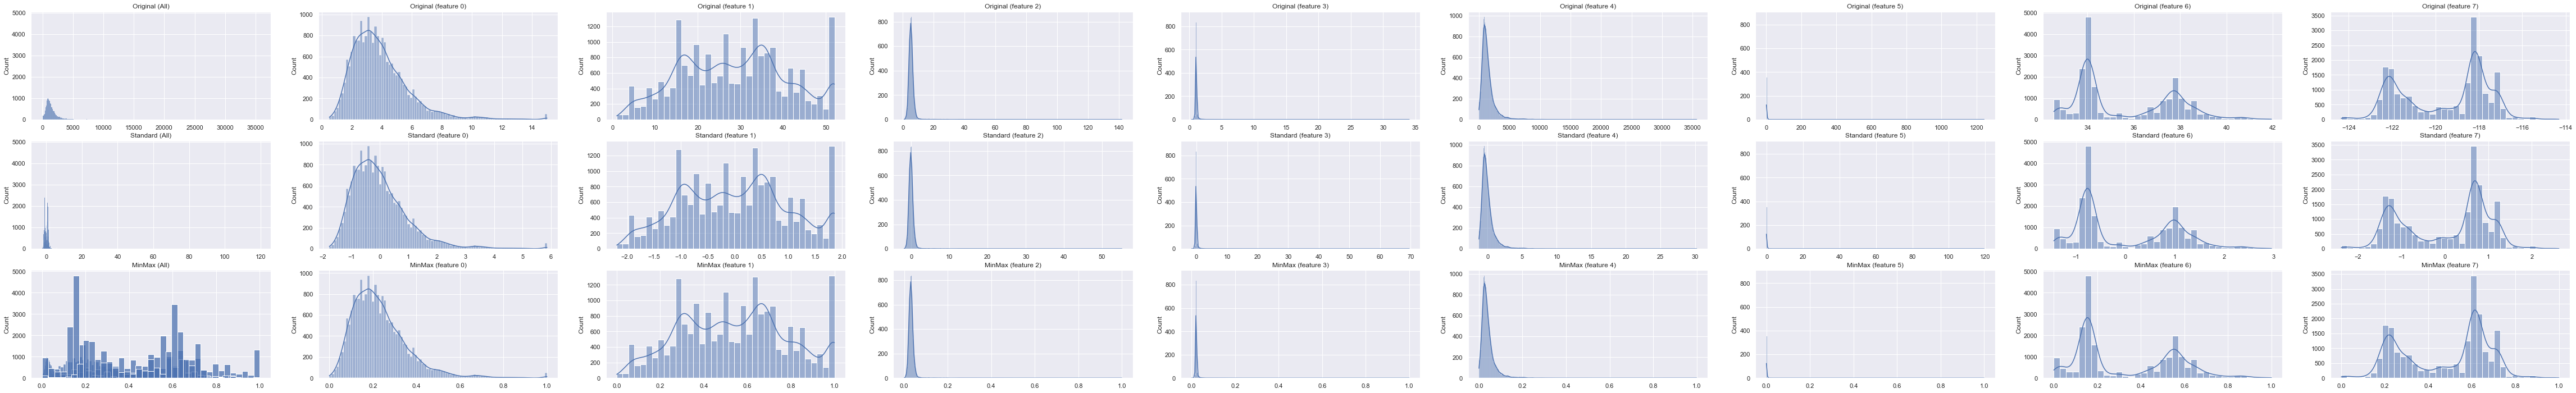

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def plot_distribution(X_dict):
    
    sns.set(rc = {"figure.figsize": (9 * (X_dict["Original"].shape[1] + 1), 4 * len(X_dict))})
    
    plot_index = 1
    for X_index, (title, X) in enumerate(tqdm(X_dict.items())):
        
        plt.subplot(len(X_dict), X.shape[1] + 1, plot_index)
        plot_index += 1
        # Plot all dimensions.
        for i in range(X.shape[1]):
            sns.histplot(X[:, i], kde=False)
        plt.title("{title} (All)".format(title = title))

        # Plot each dimension.
        for i in range(X.shape[1]):
            plt.subplot(len(X_dict), X.shape[1] + 1, plot_index)
            plot_index += 1
            sns.histplot(X[:, i], kde=True)
            plt.title("{title} (feature {index})".format(title = title, index = i))
    
    plt.show()

X_standard = StandardScaler().fit_transform(X)
X_minmax = MinMaxScaler().fit_transform(X)
plot_distribution({"Original": X, "Standard": X_standard, "MinMax": X_minmax})

In [4]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

def fit_regressor_and_print_result(X, y, title):
    # Split data.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
    
    # Fit regressor.
    model = MLPRegressor(random_state = 1, max_iter = 500).fit(X_train, y_train)
    
    # Print result.
    print("-------------------------------")
    print("Result for {title}:".format(title = title))
    print("#iterations:\t", model.n_iter_)
    print("r2 score:\t", model.score(X_test, y_test))

fit_regressor_and_print_result(X, y, "Original")
fit_regressor_and_print_result(X_standard, y, "Standard")
fit_regressor_and_print_result(X_minmax, y, "MinMax")

-------------------------------
Result for Original:
#iterations:	 58
r2 score:	 0.49910058329112905
-------------------------------
Result for Standard:
#iterations:	 176
r2 score:	 0.7750855415125246
-------------------------------
Result for MinMax:
#iterations:	 469
r2 score:	 0.7382435494810327
